In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import sys


In [2]:
x = pd.read_csv("./Downloads/Train.csv")
x1 = x["feature_1"].values
x2 = x["feature_2"].values
x3 = x["feature_3"].values
x4 = x["feature_4"].values
x5 = x["feature_5"].values
x6 = np.ones(x1.shape[0]) # inserting one more row to account for the intercept term
X_matrix = np.array([x1,x2,x3,x4,x5,x6])
Y = x["target"].values
Y = Y.reshape(Y.shape[0],1)
X_matrix.shape

(6, 1600)

# pairwise plotting shows no dependance among any feature

# hypothesis function

In [3]:
# weight matrix = [[w1,w2,w3,w4,w5,b]].T
def hypothesis(X_matrix, Weight_matrix):
    k = np.dot(Weight_matrix,X_matrix).T
    return k
    

# error function : J = 1/2*(sum(hx - y))

In [4]:
def error(X_matrix,Y,Weight_matrix):
    error = 0
    hX = hypothesis(X_matrix,Weight_matrix)
    for i in range(X_matrix.shape[1]):
        error = (hX[i][0] - Y[i][0])**2
    return error/2 

# gradient of partial derivative  

##### returning a matrix of partial derivatives

In [5]:
def gradient(X_matrix,Weight_matrix,Y):
    grad_matrix = np.zeros(Weight_matrix.shape)
    hx =  hypothesis(X_matrix,Weight_matrix)
    
    
    for i in range(X_matrix.shape[1]):
        grad_matrix[0][0] += (hx[i][0]-Y[i][0])*X_matrix[0][i]
        grad_matrix[0][1] += (hx[i][0]-Y[i][0])*X_matrix[1][i]
        grad_matrix[0][2] += (hx[i][0]-Y[i][0])*X_matrix[2][i]
        grad_matrix[0][3] += (hx[i][0]-Y[i][0])*X_matrix[3][i]
        grad_matrix[0][4] += (hx[i][0]-Y[i][0])*X_matrix[4][i]
        grad_matrix[0][5] += (hx[i][0]-Y[i][0])*X_matrix[5][i]
        
    
    return grad_matrix

# gradient descent algorithm

In [6]:
def gradient_descent(X_matrix,Y,learning_rate =0.001):
    Weight_matrix = np.array([[1.0,2.0,8.0,1.0,2.0,8.0]])
    err_list = [];
    i = 0
    while(i<1000):   
        grad_matrix = gradient(X_matrix,Weight_matrix,Y)
        #hx = hypothesis(X_matrix,Weight_matrix)
        
        e = error(X_matrix,Y,Weight_matrix)
        err_list.append(e)
        
        Weight_matrix[0][0] -= learning_rate*grad_matrix[0][0]
        Weight_matrix[0][1] -= learning_rate*grad_matrix[0][1]
        Weight_matrix[0][2] -= learning_rate*grad_matrix[0][2]
        Weight_matrix[0][3] -= learning_rate*grad_matrix[0][3]
        Weight_matrix[0][4] -= learning_rate*grad_matrix[0][4]
        Weight_matrix[0][5] -= learning_rate*grad_matrix[0][5]
         
    
        i+=1
    return Weight_matrix, err_list

In [7]:
if __name__ == '__main__':
    opti_w_mtrx,e_list = gradient_descent(X_matrix,Y)
    print(opti_w_mtrx)

[[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121  4.99096674]]


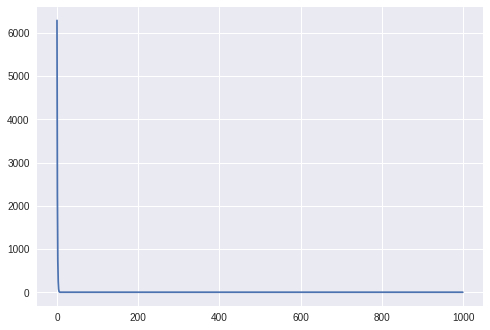

In [8]:
plt.plot(e_list)
plt.show()

In [9]:
xtest = pd.read_csv("./Downloads/Test.csv")
X_test = xtest.values.T
intercept_row = np.ones(X_test.shape[1])
X_test = np.vstack((X_test,intercept_row))
predictions = hypothesis(X_test,opti_w_mtrx)
print("the predicted matrix of values :")
print(predictions)

the predicted matrix of values :
[[ 1.14583689e+02]
 [ 1.18012815e+02]
 [-2.17398523e+01]
 [-4.39368985e+01]
 [-9.59148984e+01]
 [-4.45074240e+01]
 [-7.55665260e+01]
 [ 2.38208355e+01]
 [ 1.73835284e+02]
 [ 1.72849290e+02]
 [-1.05402312e+02]
 [-2.08020234e+01]
 [-3.91323777e+00]
 [ 1.22999186e+02]
 [ 4.03078842e+01]
 [ 4.57128495e+01]
 [-1.89628491e+02]
 [ 2.26125454e+01]
 [ 1.16410473e+01]
 [ 1.36342143e+02]
 [ 6.49162552e+01]
 [-6.19884884e+01]
 [-1.08194679e+02]
 [-7.41212747e+00]
 [-5.85239528e+01]
 [ 1.18889777e+01]
 [ 2.92376400e+01]
 [ 1.07687579e+02]
 [ 2.41468563e+01]
 [-2.61050120e+01]
 [ 1.10968076e+02]
 [-4.48797096e+01]
 [ 2.16799939e+02]
 [-1.38606052e+01]
 [-2.28603182e+02]
 [ 1.54896021e+02]
 [-2.22583390e+00]
 [ 1.27230344e+01]
 [-3.08307877e+02]
 [ 7.71107583e+01]
 [-8.12079177e+01]
 [-2.06632925e+02]
 [-2.38762881e+02]
 [ 1.34757365e+02]
 [-7.37514777e+01]
 [ 1.05463702e+02]
 [-3.59074927e+00]
 [ 2.06043839e+01]
 [-9.80187354e+01]
 [-2.75169049e+01]
 [ 1.08159001e+01